<a href="https://colab.research.google.com/github/JoshuaHaga/covid_tracking_project/blob/master/Harrisonburg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

Click on the option, run all. 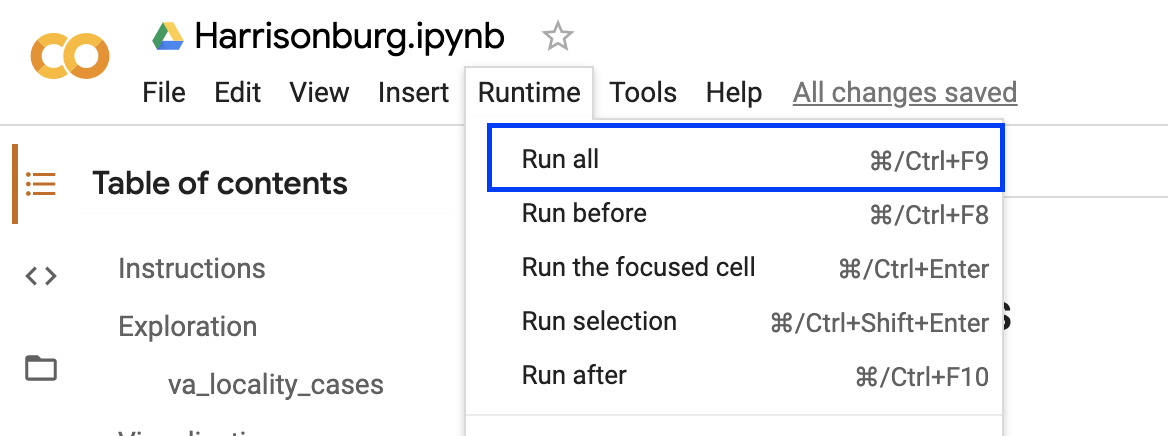

Once clicked, wait a moment for everything to finish processing. When finished, scroll to the bottomw where the visualizations are. Under neath the interactive visualizations, will be a link.

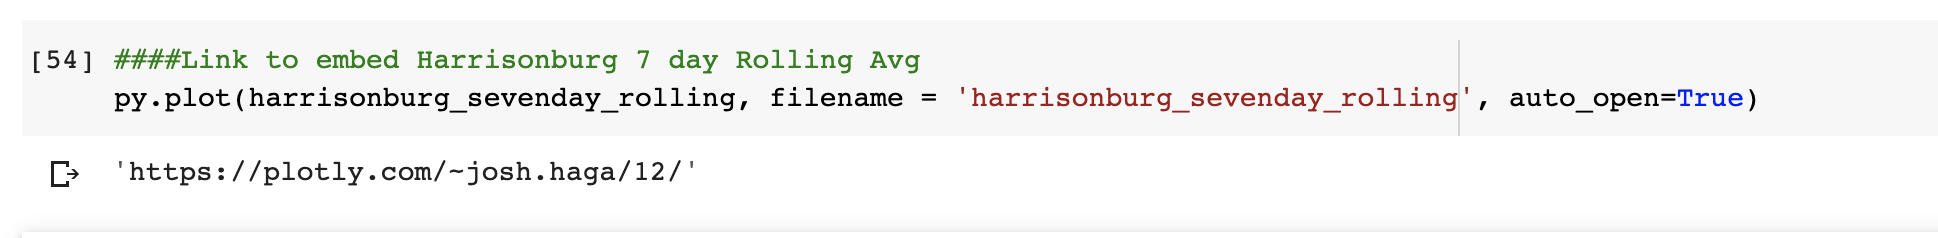

The link can be copied and pasted into various posts or webpages to create an interactive visualization. 

In [156]:
###Must run for visualizations
!pip install plotly==4.9.0

In [157]:
#Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as plt

In [158]:
!pip install sodapy

In [159]:
###Data import API
from sodapy import Socrata
client = Socrata("data.virginia.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.virginia.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
va_cases = client.get("bre9-aqqr", limit=500000)
va_cases_zip = client.get("8bkr-zfqv", limit=500000)

# Convert to pandas DataFrame
va_locality_cases = pd.DataFrame.from_records(va_cases)
va_cases_zip = pd.DataFrame.from_records(va_cases_zip)

In [160]:
#Dependencies for choropleth
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [161]:
#Chart studio is required in order to embed the charts
!pip install chart_studio

In [162]:
#Plotly embed dependencies. API crednetials can be replaced by your own with a free account. 
import plotly
import chart_studio
import chart_studio.plotly as py
username = 'josh.haga' # your username
api_key = '6bgoxTaL6JLm9a9DquYX' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [163]:
###Datasets
###va_locality_cases = pd.read_csv('https://raw.githubusercontent.com/JoshuaHaga/covid_tracking_project/master/VDH-COVID-19-PublicUseDataset-Cases.csv')
###va_cases_zip      = pd.read_csv('https://raw.githubusercontent.com/JoshuaHaga/covid_tracking_project/master/VDH-COVID-19-PublicUseDataset-ZIPCode.csv')

#Exploration

In [164]:
###Filter for just harrisonburg
harrison_zip = [22801,22802,22803,22807]
harrison_cases = va_cases_zip[va_cases_zip['zip_code'].isin(['22801','22802','22803','22807'])]
#harrison_cases

###va_locality_cases

In [165]:
###Convert to datetime
va_locality_cases['report_date'] = pd.to_datetime(va_locality_cases['report_date'])

In [166]:
va_locality_cases['report_date'] = va_locality_cases['report_date'].dt.date

In [167]:
va_locality_cases['report_date'] = va_locality_cases['report_date'].astype(str)

In [168]:
va_locality_cases = va_locality_cases.sort_values(['report_date'], ascending=True)

In [169]:
#va_comb = pd.merge(va_locality_cases,va_cases_zip, on=)

In [170]:
va_locality_cases['report_date'].describe()

count          24738
unique           186
top       2020-05-11
freq             133
Name: report_date, dtype: object

In [171]:
current_cases = va_locality_cases[va_locality_cases['report_date'] == va_locality_cases['report_date'].max()]

In [172]:
#va_county_cases_fig = px.choropleth(current_cases, geojson=counties, locations='fips', color='total_cases',
 #color_continuous_scale='portland',
 #range_color=(va_locality_cases['total_cases'].min(), va_locality_cases['total_cases'].mean()*4),
 #scope='usa',
 #labels={'color':'Current Covid Cases',
#         'locality':'County',
 #        }
 #)
#va_county_cases_fig.update_geos(fitbounds="locations", visible=False)
#va_county_cases_fig.update_layout(
#    title_text = 'Positive Results by County in VA'
#)
#va_county_cases_fig.show()
#va_county_cases_fig.write_html('/content/full_map.html')

In [173]:
def rolling_seven_avg(df,locality,feature,days):
  df = df[df['locality']==locality]
  df['new_cases'] = df[feature].astype(int).diff()
  rolling_avg = df['new_cases'].rolling(window=days).mean()
  df['rolling_avg'] = rolling_avg
  return df
 

In [174]:
def col_list(dataframe):
  val_counts = dataframe.value_counts()
  val_as_pd  = pd.DataFrame(val_counts).T
  val_list   = val_as_pd.columns.tolist()
  return val_list

In [175]:
                                                                                                                                                                                                                                                                                                                                                 harrison = rolling_seven_avg(va_locality_cases,'Harrisonburg','total_cases',7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
#harrison['rolling_avg'].plot(kind='bar',)

In [177]:
harrisonburg_sevenday_rolling = px.bar(harrison, x='report_date', y='rolling_avg', color='new_cases',
                                       labels={'rolling_avg':'Seven Day Rolling Average of New Cases',
                                               'new_cases':'Number of New Cases',
                                               'report_date':'Date',},color_continuous_scale='viridis')
#harrisonburg_sevenday_rolling.show()

In [178]:
py.plot(harrisonburg_sevenday_rolling, filename = 'harrisonburg_sevenday_rolling', auto_open=True)

'https://plotly.com/~josh.haga/12/'

In [179]:
augusta = rolling_seven_avg(va_locality_cases,'Augusta','total_cases',7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [180]:
augusta_sevenday_rolling = px.bar(augusta, x='report_date', y='rolling_avg',
                                  labels={'rolling_avg':'Number of Positive Cases', 
                                      'report_date':'Date',
                                      },height=400)
#augusta_sevenday_rolling.show()

##Weekly Average of New cases

In [181]:
### Datatype need to be converted to datetime
type(va_locality_cases['report_date'][0:1])

pandas.core.series.Series

In [182]:
from datetime import datetime

In [183]:
va_locality_cases['report_date'] = pd.to_datetime(va_locality_cases['report_date'])

In [184]:
va_locality_cases_dtindex = va_locality_cases.set_index('report_date')

In [185]:
build_test = va_locality_cases_dtindex[va_locality_cases_dtindex['locality']=='Harrisonburg']

In [197]:
build_test['fips'][1]

'51660'

In [186]:
test = build_test.total_cases.resample('W-MON').last()

In [187]:
test.head(5)

In [198]:
def weekly_increase_cases(df,locality):
  df['report_date']    = pd.to_datetime(df['report_date'])
  df_dt = df.set_index('report_date')
  filter_locality = df_dt[df_dt['locality']==locality]
  fips = filter_locality['fips'][0]
  weekly = filter_locality.total_cases.resample('W-MON').last()
  export = pd.DataFrame(weekly)
  export['fips'] = fips
  return export


In [199]:
harrisonburg_weekly_new = weekly_increase_cases(va_locality_cases,'Harrisonburg')

In [201]:
harrisonburg_weekly_new.head()

,total_cases,fips
report_date,,
2020-03-23,1,51660
2020-03-30,6,51660
2020-04-06,27,51660
2020-04-13,87,51660
2020-04-20,252,51660


# Visualizations

###Harrisonburg 7 day Rolling Avg

In [ ]:
harrisonburg_sevenday_rolling.show()

In [ ]:
####Link to embed Harrisonburg 7 day Rolling Avg
py.plot(harrisonburg_sevenday_rolling, filename = 'harrisonburg_sevenday_rolling', auto_open=True)

###VA Cases by county 

In [ ]:
va_county_cases_fig.show()

In [ ]:
#py.plot(va_county_cases_fig, filename = 'va_county_cases_fig', auto_open=True)